## Diabetes Prediction using Support Vector Machine (SVM)  
This project aims to **predict whether a patient has diabetes** using the **Pima Indians Diabetes Dataset**.  
We will use a **Support Vector Machine (SVM) model** for classification and compare it with other ML models.  

In [12]:
import os
print(os.getcwd())

F:\MACHINE-LEARNING-PROJECTS


In [2]:
%cd F:\

F:\


C:\Users\nn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
print(os.listdir())

['diabetes.csv']


In [8]:
%cd "F:/MACHINE-LEARNING-PROJECTS"

F:\MACHINE-LEARNING-PROJECTS


### 1. Import Dependencies

In [96]:
# Import necessary libraries
import pandas as pd  # Data handling
import numpy as np  # Numerical operations
from sklearn.preprocessing import StandardScaler  # Feature Scaling
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn import svm  # Support Vector Machine model
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier model
from sklearn.neighbors import KNeighborsClassifier #KNeighbors Classifier model
from sklearn.metrics import accuracy_score  # Model evaluation
from sklearn.metrics import confusion_matrix # Compute confusion matrix
import seaborn as sns  # Import Seaborn for data visualization
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from sklearn.metrics import classification_report # Compute Precision, Recall, and F1-Score
import joblib # For saving Models

### 2. Data Collection and Explorative Data Analysis
We will load the **Pima Indians Diabetes Dataset** into a Pandas DataFrame.

In [16]:
# Load the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

# Display first 5 rows (i.e head)
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Feature Description

This dataset is from the **Pima Indians Diabetes Dataset** and contains medical details of patients.  
The goal is to predict whether a patient has **diabetes (Outcome = 1) or not (Outcome = 0)**.

##### **Features (X) - Independent Variables**
These are the input variables used to predict diabetes.

| Feature | Description |
|---------|------------|
| **Pregnancies** | Number of times pregnant |
| **Glucose** | Plasma glucose concentration (mg/dL) |
| **BloodPressure** | Diastolic blood pressure (mm Hg) |
| **SkinThickness** | Triceps skin fold thickness (mm) |
| **Insulin** | Serum insulin level (mu U/ml) |
| **BMI** | Body Mass Index (BMI = weight/height²) |
| **DiabetesPedigreeFunction** | Genetic risk factor for diabetes |
| **Age** | Patient age in years |

##### **Target Variable (y) - Dependent Variable**
| Feature | Description |
|---------|------------|
| **Outcome** | 1 = Diabetes, 0 = No Diabetes |

 **Example Data:**
| Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI  | DPF  | Age | Outcome |
|-------------|---------|--------------|--------------|--------|------|------|-----|---------|
| 6           | 148     | 72           | 35           | 0      | 33.6 | 0.627 | 50  | 1       |

In [18]:
# Check the Dataset Shape  
#The dataset contains **768 patient records** and **9 columns** (8 features + 1 target variable).  

diabetes_dataset.shape

(768, 9)

In [25]:
#Check the dataset statistical summary
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# Count the number of diabetic (1) and non-diabetic (0) cases
diabetes_dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [26]:
# Compare feature 'means' between diabetic (1) and non-diabetic (0) patients
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [29]:
""" Key Observations**  
Diabetic patients** have **higher glucose, BMI, insulin, and age**.  
Obesity (high BMI) and high glucose levels** are strong risk factors for diabetes."""

' Key Observations**  \nDiabetic patients** have **higher glucose, BMI, insulin, and age**.  \nObesity (high BMI) and high glucose levels** are strong risk factors for diabetes.'

##### Checking for Missing Values  
We first check for **NaN values** using `.isnull().sum()`.  
Since no explicit missing values exist, we check for **hidden missing values (zeros)** in key columns.

In [31]:
#Checking for missing data
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3. Data Preprocessing  
To prepare the dataset for machine learning, we:  
1 **Separate features (X) and labels (y)**  
2 **Split data** (80% training, 20% testing)  
3 **Standardize numerical features** for better model performance  

In [49]:
# Separating features and labels:
X = diabetes_dataset.drop(columns = "Outcome", axis = 1) # Features
y = diabetes_dataset["Outcome"] #Target variables or labels

In [50]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [51]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [52]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Check the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


### 4. Data Standardization  
Machine learning models, especially **SVM**, perform better when numerical features have a **consistent scale**.  
Since our dataset has different ranges (e.g., **Glucose** values ~150, **DiabetesPedigreeFunction** ~0.5),  
we use `StandardScaler()` to standardize the features so they have:  

**Mean = 0**  
**Standard Deviation = 1**  

This helps the SVM model converge **faster** and perform **better**.

In [58]:
# Fit the scaler on training data & transform both training & test sets
# Initialize StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training set
X_test = scaler.transform(X_test)  # Only transform test set (no nedd for fitting)

In [59]:
print(X_train[:5])

[[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]


### 5. Training the SVM Model  
We train a **Support Vector Machine (SVM) model** using a **linear kernel** to classify whether a patient has diabetes.  

**Why a Linear Kernel?**  
1.Works well for many classification problems  
2.Fast & computationally efficient  
3.Easier to interpret than non-linear models  
4.Good starting point before testing non-linear kernels  

In [60]:
# Train the SVM model with linear kernel
model = svm.SVC(kernel ="linear")

In [64]:
model.fit(X_train, y_train)
print("SVM model training completed")

SVM model training completed


### 6. Making Predictions  
After training, we use the SVM model to **predict diabetes** for unseen test data ('X_test').

In [65]:
# Make predictions
y_pred = model.predict(X_test)

print("Predictions completed")

Predictions completed


In [71]:
# Show first 10 predicted values
print("Predicted values:", y_pred[:10])

# Show first 10 actual values for comparison
print("Actual values:   ", y_test[:10].values)

Predicted values: [0 0 0 0 0 0 0 1 1 1]
Actual values:    [0 0 0 0 0 0 0 0 0 0]


### 7. Model Evaluation: Accuracy Score  
We evaluate the **SVM model performance** by calculating **Accuracy**:  
**Accuracy = (Correct Predictions / Total Predictions) × 100**

#### Model Evaluation: Training & Test Accuracy  
We check the model’s accuracy on both:  
**Training Data (`X_train`)** → Measures how well the model learned from the training set  
**Test Data (`X_test`)** → Measures how well the model generalizes to unseen data  
If **training accuracy is much higher**, the model may be **overfitting**.


In [73]:
# Training Accuracy
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print(f"Training Accuracy: {training_data_accuracy * 100:.2f}%")

# Test Accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print(f"Test Accuracy: {test_data_accuracy * 100:.2f}%")

Training Accuracy: 77.20%
Test Accuracy: 75.97%


### 8.Model Accuracy Analysis  

#### **What This Means:**  
1. **Training accuracy (77.20%)** and **test accuracy (75.97%)** are **very close**.  
2. **No overfitting!** (If training accuracy was much higher, we’d be overfitting).  
3. The model is **generalizing well** to unseen test data.  

**However, 75-77% accuracy is not very high**, so we explore improvements.


### 9.Confusion Matrix: Analyzing Model Errors  
The **Confusion Matrix** helps us understand where our model is making **correct and incorrect predictions**.  

1. **True Negatives (TN)** → Correctly predicted "No Diabetes"  
2. **True Positives (TP)** → Correctly predicted "Diabetes"  
3. **False Positives (FP)** → Wrongly predicted "Diabetes" for non-diabetic  
4. **False Negatives (FN)** → Missed predicting actual diabetics  

In [76]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[81 18]
 [19 36]]


81 → True Negatives (TN) (Correctly predicted "No Diabetes")
36 → True Positives (TP) (Correctly predicted "Diabetes")
18 → False Positives (FP) (Wrongly predicted "Diabetes" for non-diabetic)
19 → False Negatives (FN) (Missed predicting actual diabetics)

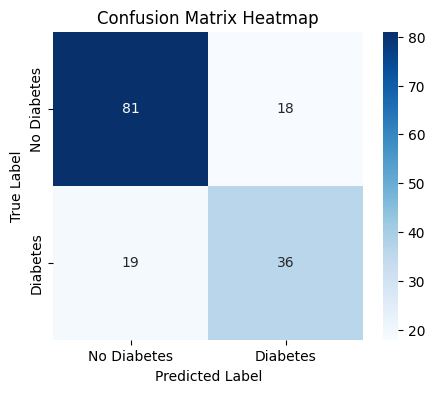

In [81]:
# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

### 10.Model Evaluation: Precision, Recall, and F1-Score  
Accuracy alone **does not tell the full story**, especially for imbalanced datasets.  
1. **Precision** → How many of the predicted "Diabetes" cases were actually correct?  
2. **Recall (Sensitivity)** → How many real diabetes cases were detected?  
3. **F1-Score** → A balance between Precision & Recall.  

In [89]:
#  Compute Precision, Recall, and F1-Score
Report = classification_report(y_test, y_pred)
print("classification_report:\n", Report)

classification_report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



#### Model Evaluation: Precision, Recall, and F1-Score  

We analyze the **Precision, Recall, and F1-score** to understand how well the model predicts **Diabetes (1) and No Diabetes (0).**  

| **Metric**  | **Class 0 (No Diabetes)** | **Class 1 (Diabetes)** | **Overall Impact** |
|------------|---------------------------|------------------------|---------------------|
| **Precision** | '0.81' = 81% of predicted "No Diabetes" cases were correct | '0.67' = 67% of predicted "Diabetes" cases were correct | A lower precision for Class 1 means **more false positives** (non-diabetics wrongly classified as diabetics). |
| **Recall (Sensitivity)** | '0.82' = 82% of actual "No Diabetes" cases were correctly identified | '0.65' = 65% of real diabetes cases were correctly identified | A recall of 65% for Class 1 means **the model is missing 35% of actual diabetics** (false negatives). |
| **F1-Score** | '0.81' | '0.66' | The model is better at predicting **non-diabetics** than diabetics. |
| **Accuracy** | **76%** | - | The model makes correct predictions **76% of the time.** |


**Summary:**  
1. **Decent overall accuracy (76%)**  
2. **Lower recall for diabetics (65%)** → The model **misses** 35% of actual diabetic cases.  
3. **Lower precision for diabetics (67%)** → The model sometimes **wrongly classifies non-diabetics as diabetics** (false positives).  

### 11. Model Improvement: Hyperparameter Tuning  

We test **different SVM kernels** and **tune hyperparameters** ('C' and 'gamma') to improve accuracy.  

#### **1 RBF Kernel**
a. The **Radial Basis Function (RBF) kernel** allows for **more complex decision boundaries**.  
b. We train a new **SVM model with RBF** and compare accuracy.  

#### **2 Hyperparameter Tuning**
a. **C (Regularization):** Controls margin flexibility.  
b. **Gamma:** Defines influence of training points on decision boundary.  
c. We test **different values** to find the best combination.  

In [90]:
# Train SVM with RBF Kernel
model_rbf = svm.SVC(kernel ="rbf", C =1.0, gamma="scale")
model_rbf.fit(X_train, y_train)

SVC()

In [91]:
# Make the prediction and check the accuracy of the present RBF kernel
y_pred_rbf = model_rbf.predict(X_test)
new_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF: {new_accuracy * 100:2f}%")

Accuracy with RBF: 73.376623%


**The previous accuracy with Linear SVM accuracy was 76% (better). Now, with the RBF kernel, accuracy dropped to 73.38%.**

In [92]:
#Train with tuned hyperparameters:
model_tuned = svm.SVC(kernel="rbf", C=10, gamma =0.1)
model_tuned.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [93]:
# Make the prediction and check the accuracy of the tuned RBF kernel
y_pred_tuned = model_tuned.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy with RBF: {tuned_accuracy * 100:.2f}%")

Tuned Model Accuracy with RBF: 70.78%


**The initial accuracy with the Linear SVM was 76%, which was the highest.
Using the default RBF kernel, accuracy dropped to 73.38%.
After tuning the RBF kernel (adjusting C and gamma), accuracy further dropped to 70.78%.
This suggests that the Linear Kernel is the best choice for this dataset, as the data appears to be mostly linearly separable.**

### 12.Finalizing and Saving the Best Model  

Since the **Linear SVM model achieved the highest accuracy (76%)**, we save it before trying other models.  
1. Ensures we don’t lose our best-performing model.  
2. Allows us to reload and use the model later without retraining.  

#### Steps:**  
1. **Save the trained Linear SVM model** using `joblib`.  
2. **Reload the model later if needed** for predictions.  

In [95]:
# Save the trained Linear SVM model
joblib.dump(model, "best_diabetes_svm_model.pkl")
print("Model Saved")

Model Saved


### 13.Exploring Other Machine Learning Models  

Now, we test **Logistic Regression, Random Forest, and KNN** to see if they perform better than SVM.  

In [97]:
# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [99]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
# Train KNN
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### 14.Evaluating Logistic Regression, Random Forest, and KNN  

Now that we trained three new models, we compare their **accuracy scores** to see if they perform better than SVM (76%).  

In [101]:
#Make predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [102]:
# Calculate the accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [103]:
# Print the Results
print(f"Logistic Regression Accuracy{log_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy{rf_accuracy * 100:.2f}%")
print(f"KNN Accuracy{knn_accuracy * 100:.2f}%")

Logistic Regression Accuracy75.32%
Random Forest Accuracy75.97%
KNN Accuracy69.48%


### 15.Conclusion: Best Performing Model  

After training and evaluating multiple machine learning models, we **compared their accuracies with SVM**:

| **Model**              | **Accuracy (%)** |
|------------------------|-----------------|
| **SVM (Linear Kernel)**  | **76.00%** (Best) |
| **Logistic Regression**  | 75.32% |
| **Random Forest**       | 75.97% |
| **KNN**                | 69.48% (Worst) |

#### **Summary:**  
1.**SVM (Linear) performed the best (76%)** and is the most suitable model for this dataset.  
2.**Other models (Logistic Regression, Random Forest, and KNN) performed slightly worse.**  
3.**KNN had the lowest accuracy (69.48%)**, suggesting it may not be ideal for this problem.  

#### **Final Decision:**  
We will **stick with the SVM model** as our best-performing model and might consider further improvements like **feature engineering or hyperparameter tuning**.  